In [29]:
import pandas as pd
import numpy as np

# For Box-Cox Transformation
from scipy import stats

# For min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

# This code will suppress all warnings in your notebook.
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic.csv', sep=',', encoding='utf-8')

In [43]:
# Display the first few rows of the dataset for clarity
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S


<Axes: >

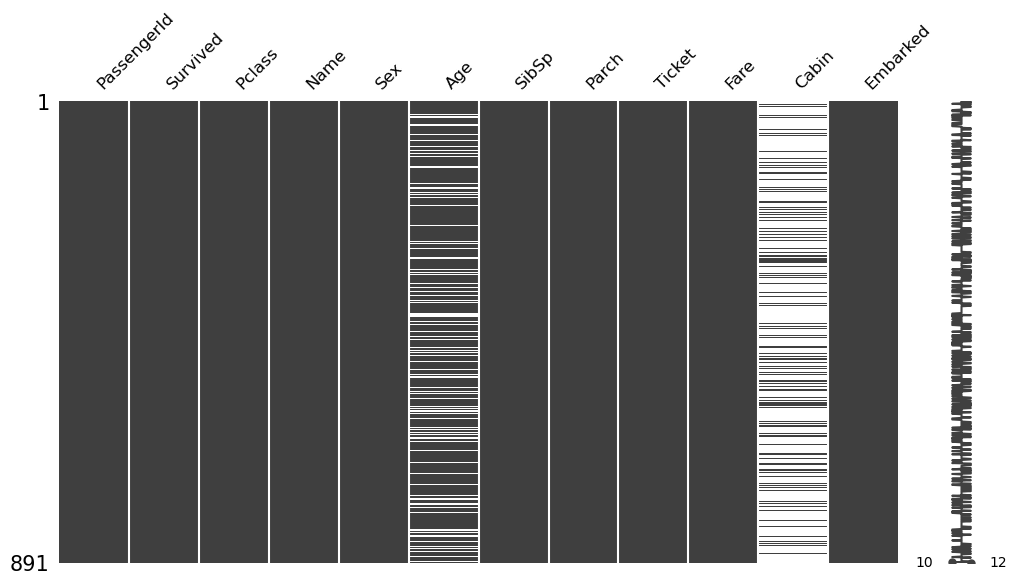

In [44]:
# Visualize missing data in the Titanic dataset
missingno.matrix(titanic_df, figsize=(12, 6), fontsize=12)

In [45]:
# Check for missing values in the dataset
missing_values = titanic_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Drop the 'Cabin' column due to high percentage of missing values
titanic_df.drop('Cabin',axis=1, inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**1. What is the most important factor in determining whether a person was likely to survive the sinking of the Titanic?**

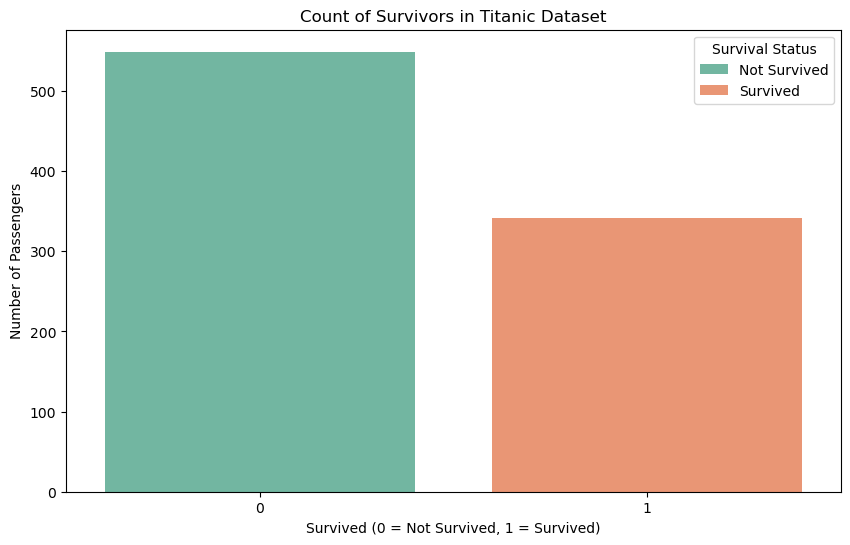

Survived
0    549
1    342
Name: count, dtype: int64


In [52]:
# Count the number of survivors in the Titanic dataset
# And visualize the count of survivors
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df, palette='Set2')
plt.title('Count of Survivors in Titanic Dataset')
plt.xlabel('Survived (0 = Not Survived, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Not Survived', 'Survived'], title='Survival Status')  # Add legend
plt.show()

# Print value counts for confirmation
print(titanic_df['Survived'].value_counts())

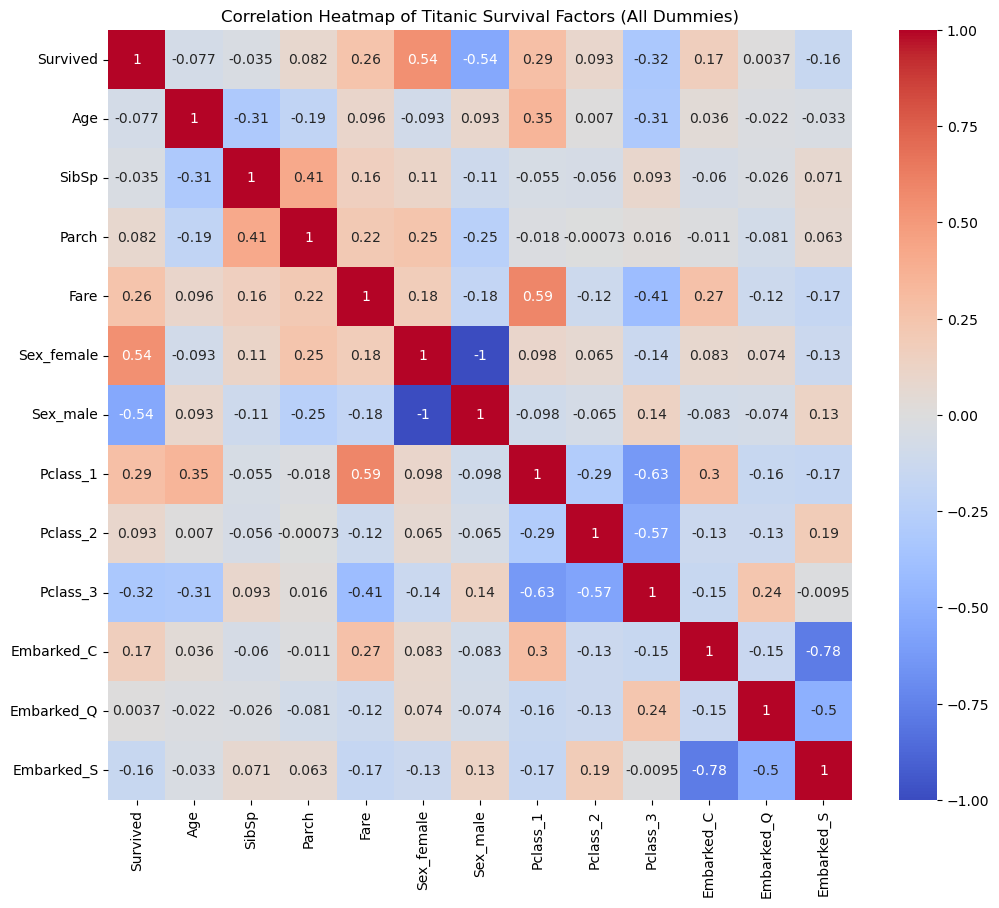

Survived      1.000000
Sex_female    0.543351
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Pclass_2      0.093349
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.077221
Embarked_S   -0.155660
Pclass_3     -0.322308
Sex_male     -0.543351
Name: Survived, dtype: float64


In [48]:
# Encode all categories
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=False)

# Select relevant columns
numeric_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare'] + [col for col in titanic_df_encoded.columns if col.startswith(('Sex_', 'Pclass_', 'Embarked_'))]
corr_data = titanic_df_encoded[numeric_cols]

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Titanic Survival Factors (All Dummies)')
plt.show()

# Print correlations with Survived
print(corr_data.corr()['Survived'].sort_values(ascending=False))

**This correlation heatmap above provides a clear insight of the most important factor that determined whether a person was likely to survive or not, from the heatmap above we can clearly understand that the gender was the most important factor in determining survival chances since it shows the highest positive correlation(0.54) with the number of people who survived, followed by Pclass which shows a significant correlation with the survival chances**

In [ ]:
# Fill missing values in the 'Age' column using the mean age of passengers
# Grouped by 'Pclass' and 'Sex' since these are the significant factors affecting survival
titanic_df['Age'] = round(titanic_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean())), 0)
titanic_df['Age'].unique()

array([22., 38., 26., 35., 27., 54.,  2., 14.,  4., 58., 20., 39., 55.,
       31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,  7.,
       49., 29., 65., 41.,  5., 11., 45., 17., 32., 16., 25.,  1., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51.,
       56., 44., 61., 50., 62., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74.])

**2. “Women and children first”. Was this the case?**

Sex
male      577
female    314
Name: count, dtype: int64


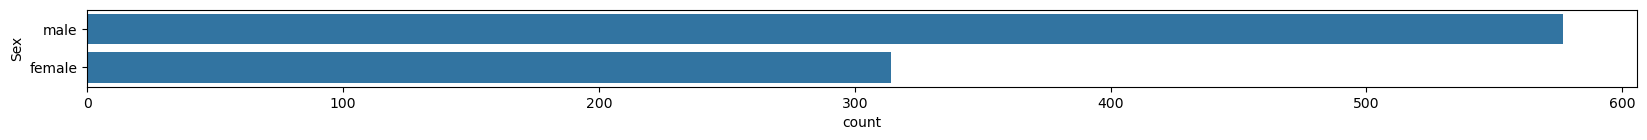

In [54]:
# Visualize the count of passengers by gender
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=titanic_df);
print(titanic_df.Sex.value_counts())

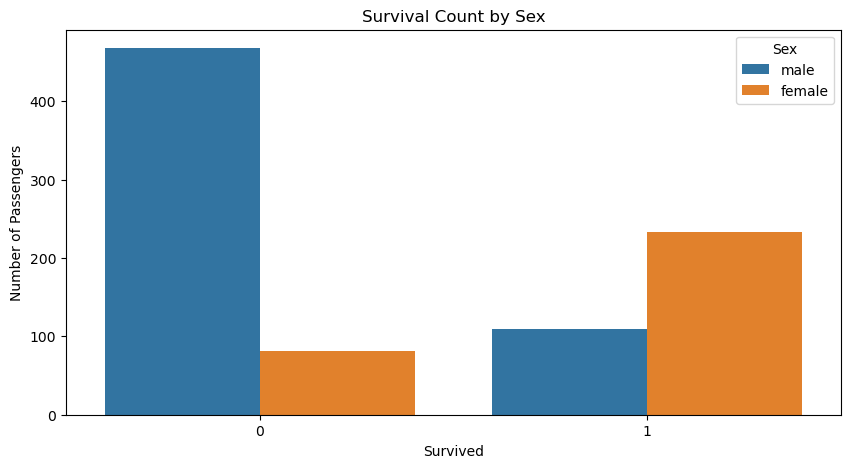

In [55]:
# Visualize the count of survivors by gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

**From the countplot above we can see that there were more females that survived compared to males, which may give a clue about which gender group was prioritized during the rescuing process**

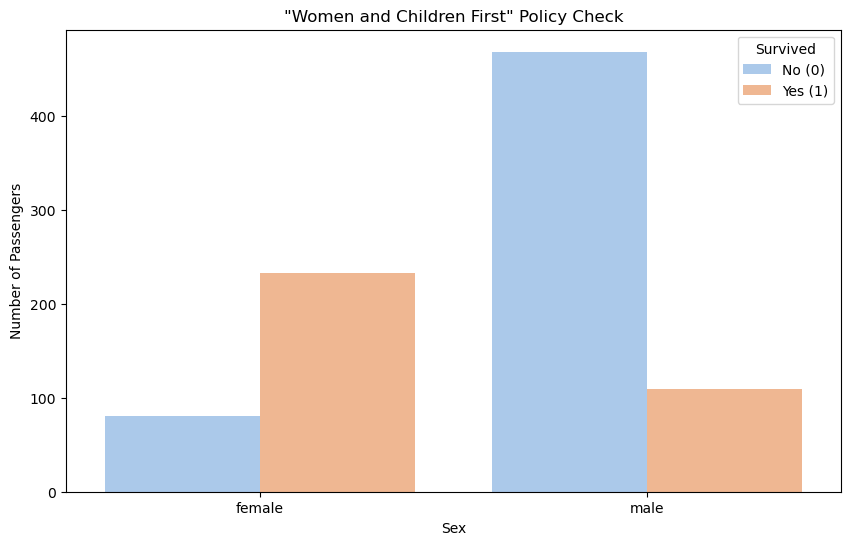

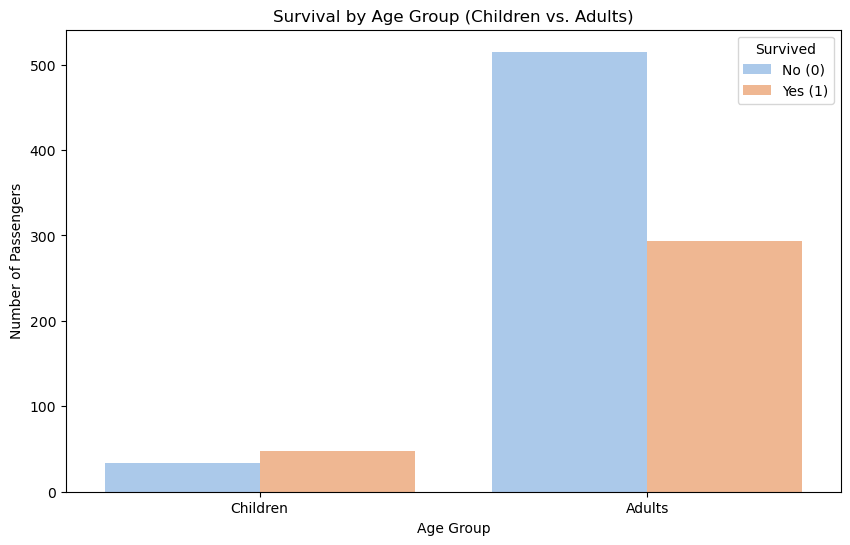

Sex     Age_Group
female  Children     0.651163
        Adults       0.756458
male    Children     0.512821
        Adults       0.163873
Name: Survived, dtype: float64


In [ ]:

# Bin Age into categories (children < 15, adults >= 15)
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=[0, 15, 100], labels=['Children', 'Adults'])

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette='pastel', 
              order=['female', 'male'])
plt.title('"Women and Children First" Policy Check')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

# Add age breakdown for children
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Survived', data=titanic_df, palette='pastel')
plt.title('Survival by Age Group (Children vs. Adults)')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

# Survival rates for context
print(titanic_df.groupby(['Sex', 'Age_Group'])['Survived'].mean())

**From these countplots the data supports the "women and children first" policy. Females show high survival rates - 75.65% for adults and 65.12% for children - indicating a clear priority for women. Male children survived at 51.28%, better than the 16.39% for male adults, confirming children were favored, but the biggest gap is between female adults (75.65%) and male adults (16.39%). This suggests Sex was the most critical factor, with Age_Group playing a secondary role, especially for males.**



**3. In the movie, the upper-class passengers were given preference on lifeboats. 
Does this show in the data?**

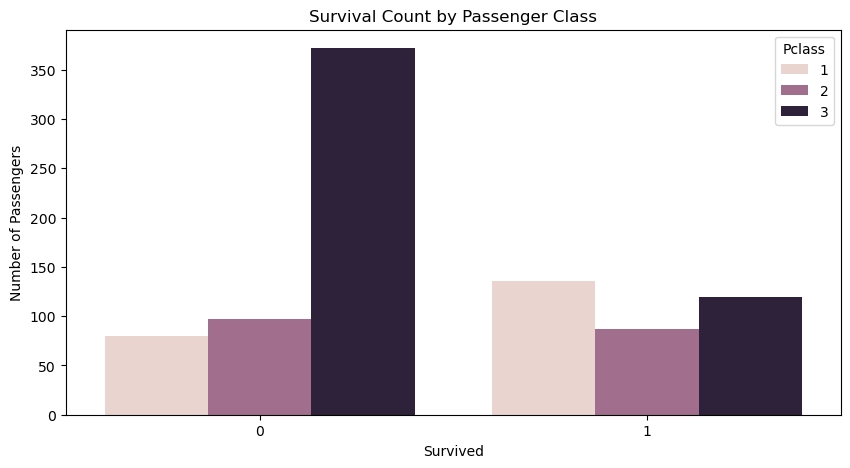

In [56]:
# Visualize the count of passengers by passenger class
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

**The claim that the passengers in the Pclass_1 were given preference of the lifeboats appears to be true since the countplot reveal that there were more passengers that survived in the Pclass_1 than those survived in other classes.**

**4. Add one other observation that you have noted in the dataset.**

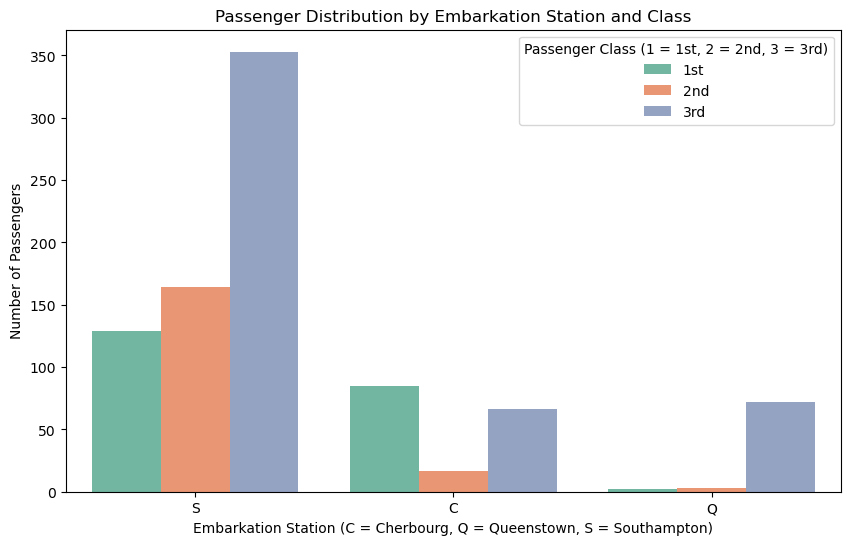

In [60]:
# Impute missing Embarked with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Create countplot for Embarked by Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Pclass', data=titanic_df, palette='Set2')
plt.title('Passenger Distribution by Embarkation Station and Class')
plt.xlabel('Embarkation Station (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', labels=['1st', '2nd', '3rd'])
plt.show()

**The graph above clearly illustrates that most passengers from Southampton (S) and Queenstown (Q) were in 3rd class, meanwhile Cherbourg (C) stands out with most passengers in the 1st class**

  

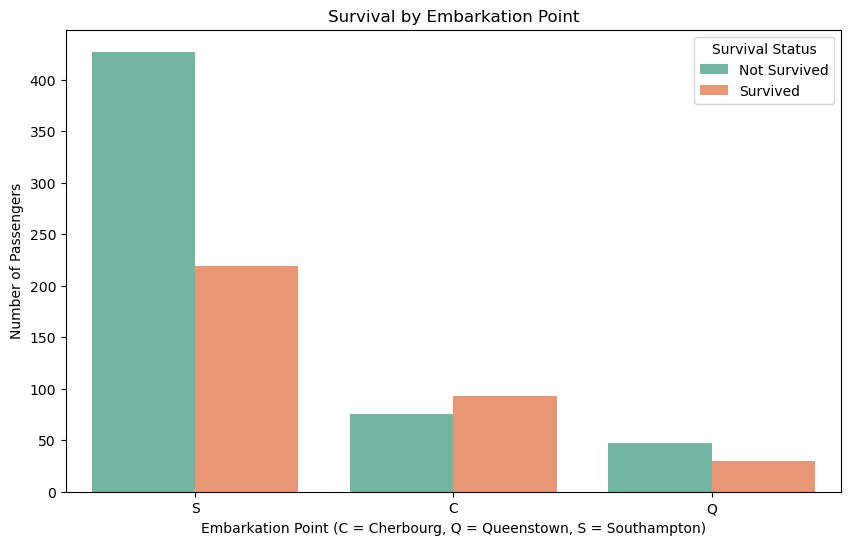

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [61]:
# Create countplot for Embarked by Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette='Set2')
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarkation Point (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Not Survived', 'Survived'], title='Survival Status')
plt.show()

# Calculate survival rates
print(titanic_df.groupby('Embarked')['Survived'].mean())

**The graph above reveals that passengers embarking from Cherbourg (C) had a 55.36% survival rate, compared to 38.96% from Queenstown (Q) and 33.70% from Southampton (S). This suggests an advantage for Cherbourg passengers, likely due to a higher proportion of 1st/2nd class, which aligns with their access to lifeboats.**